In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from bs4 import BeautifulSoup

In [42]:
df = pd.read_csv(r'C:\Users\hp\Downloads\Quora_train_dataset\train.csv')

In [43]:
new_df = df.sample(30000, random_state = 42)

In [44]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
8067,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0
368101,368101,12736,104117,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...,0
70497,70497,121486,121487,Which is more advisable and better material fo...,What is the best server setup for buddypress?,0
226567,226567,254474,258192,How do I improve logical programming skills?,How can I improve my logical skills for progra...,1
73186,73186,48103,3062,How close we are to see 3rd world war?,How close is a World War III?,1


In [45]:
# Data Preprocessing
def preprocess(q):
    q = str(q).lower().strip()

    # replacing special characters with string equivalents
    q = q.replace('%','percent')
    q = q.replace('$','dollar')
    q = q.replace('₹','rupee')
    q = q.replace('€','euro')
    q = q.replace('@','at')

    # the pattern ['math'] appears around 900 times in whole dataset
    q = q.replace('[math]',' ')

    # replacing some numbers with string equivalents
    q = q.replace(',000,000,000','b')
    q = q.replace(',000,000','m')
    q = q.replace(',000','k')
    q = re.sub(r'([0-9]+)000000000',r'\1b',q)
    q = re.sub(r'([0-9]+)000000',r'\1m',q)
    q = re.sub(r'([0-9]+)000',r'\1k',q)

    # Decontracting words
    # Source - https://stackoverflow.com/a

    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had",
    "he'd've": "he would have",
    "he'll": "he shall",
    "he'll've": "he shall have",
    "he's": "he has / he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how has",
    "I'd": "I had",
    "I'd've": "I would have",
    "I'll": "I shall",
    "I'll've": "I shall have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it had",
    "it'd've": "it would have",
    "it'll": "it shall",
    "it'll've": "it shall have",
    "it's": "it has",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she had / she would",
    "she'd've": "she would have",
    "she'll": "she shall",
    "she'll've": "she shall have",
    "she's": "she has / she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that has",
    "there'd": "there had",
    "there'd've": "there would have",
    "there's": "there has",
    "they'd": "they had",
    "they'd've": "they would have",
    "they'll": "they shall",
    "they'll've": "they shall have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what shall",
    "what'll've": "what shall have",
    "what're": "what are",
    "what's": "what has",
    "what've": "what have",
    "when's": "when has",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where has",
    "where've": "where have",
    "who'll": "who shall",
    "who'll've": "who shall have",
    "who's": "who has",
    "who've": "who have",
    "why's": "why has",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had",
    "you'd've": "you would have",
    "you'll": "you shall",
    "you'll've": "you shall have",
    "you're": "you are",
    "you've": "you have"
    }

    q_contracted = []
    for word in q.split():
        if word in contractions:
            word = contractions[word]
        q_contracted.append(word)

    q = ' '.join(q_contracted)

    q = q.replace("'ve","have")
    q = q.replace("n't","not")
    q = q.replace("'re","are")
    q = q.replace("'ll","will")

    # Removing HTML Tags
    q = BeautifulSoup(q)
    q = q.get_text()

    # Remove Punctuations
    q = re.sub('\W+',' ',q).strip()

    return q

In [46]:
preprocess("I'll go to Mumbai!! How much you'll pay in ₹ for that? <br><br>")

'iwill go to mumbai how much you shall pay in rupee for that'

In [47]:
new_df['question1'] = new_df['question1'].apply(preprocess)
new_df['question2'] = new_df['question2'].apply(preprocess)

C:\Users\hp\AppData\Local\Temp\ipykernel_30468\733566225.py:160: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  q = BeautifulSoup(q)


In [48]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
8067,8067,15738,15739,how do i play pokémon go in korea,how do i play pokémon go in china,0
368101,368101,12736,104117,what are some of the best side dishes for crab...,what are some good side dishes for buffalo chi...,0
70497,70497,121486,121487,which is more advisable and better material fo...,what is the best server setup for buddypress,0
226567,226567,254474,258192,how do i improve logical programming skills,how can i improve my logical skills for progra...,1
73186,73186,48103,3062,how close we are to see 3rd world war,how close is a world war iii,1


In [49]:
new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()

In [50]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))

In [51]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
8067,8067,15738,15739,how do i play pokémon go in korea,how do i play pokémon go in china,0,33,33,8,8
368101,368101,12736,104117,what are some of the best side dishes for crab...,what are some good side dishes for buffalo chi...,0,52,50,11,9
70497,70497,121486,121487,which is more advisable and better material fo...,what is the best server setup for buddypress,0,94,44,16,8
226567,226567,254474,258192,how do i improve logical programming skills,how can i improve my logical skills for progra...,1,43,51,7,9
73186,73186,48103,3062,how close we are to see 3rd world war,how close is a world war iii,1,37,28,9,7


In [52]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split()))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split()))
    return len(w1 & w2)

In [53]:
new_df['common_word'] = new_df.apply(common_words, axis = 1)

In [54]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_word
8067,8067,15738,15739,how do i play pokémon go in korea,how do i play pokémon go in china,0,33,33,8,8,7
368101,368101,12736,104117,what are some of the best side dishes for crab...,what are some good side dishes for buffalo chi...,0,52,50,11,9,6
70497,70497,121486,121487,which is more advisable and better material fo...,what is the best server setup for buddypress,0,94,44,16,8,2
226567,226567,254474,258192,how do i improve logical programming skills,how can i improve my logical skills for progra...,1,43,51,7,9,6
73186,73186,48103,3062,how close we are to see 3rd world war,how close is a world war iii,1,37,28,9,7,4


In [55]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return (len(w1)+len(w2))

In [56]:
new_df['total_words'] = new_df.apply(total_words, axis = 1)

In [57]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_word,total_words
8067,8067,15738,15739,how do i play pokémon go in korea,how do i play pokémon go in china,0,33,33,8,8,7,16
368101,368101,12736,104117,what are some of the best side dishes for crab...,what are some good side dishes for buffalo chi...,0,52,50,11,9,6,20
70497,70497,121486,121487,which is more advisable and better material fo...,what is the best server setup for buddypress,0,94,44,16,8,2,24
226567,226567,254474,258192,how do i improve logical programming skills,how can i improve my logical skills for progra...,1,43,51,7,9,6,16
73186,73186,48103,3062,how close we are to see 3rd world war,how close is a world war iii,1,37,28,9,7,4,16


In [58]:
new_df['word_share'] = round(new_df['common_word']/new_df['total_words'],2)

In [59]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_word,total_words,word_share
8067,8067,15738,15739,how do i play pokémon go in korea,how do i play pokémon go in china,0,33,33,8,8,7,16,0.44
368101,368101,12736,104117,what are some of the best side dishes for crab...,what are some good side dishes for buffalo chi...,0,52,50,11,9,6,20,0.30
70497,70497,121486,121487,which is more advisable and better material fo...,what is the best server setup for buddypress,0,94,44,16,8,2,24,0.08
226567,226567,254474,258192,how do i improve logical programming skills,how can i improve my logical skills for progra...,1,43,51,7,9,6,16,0.38
73186,73186,48103,3062,how close we are to see 3rd world war,how close is a world war iii,1,37,28,9,7,4,16,0.25


In [62]:
# Advanced Features
# Token features
from nltk.corpus import stopwords

def fetch_token_features(row):
    q1 = row['question1']
    q2 = row['question2']

    SAFE_DIV = 0.001
    STOPWORDS = stopwords.words('english')

    token_features = [0.0]*8

    # Converting sentence into Tokens
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOPWORDS])
    q2_words = set([word for word in q2_tokens if word not in STOPWORDS])

    # Get stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOPWORDS])
    q2_stops = set([word for word in q2_tokens if word in STOPWORDS])

    # Get common stopwords from Question pairs
    common_stop_count = len(q1_stops.intersection(q2_stops))

    # Get common non-stopwords from Question pairs
    common_word_count = len(q1_words.intersection(q2_words))

    # Get common tokens from Question pairs
    common_token_count = len(set(q1_tokens).intersection(q2_tokens))

    token_features[0] = common_word_count/(min(len(q1_words),len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count/(max(len(q1_words),len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count/(min(len(q1_stops),len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count/(max(len(q1_stops),len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count/(min(len(q1_tokens),len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_word_count/(max(len(q1_tokens),len(q2_tokens)) + SAFE_DIV)

    # Last word of both questions is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])

    # First word of both questions is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])

    return token_features

In [63]:
token_features = new_df.apply(fetch_token_features, axis = 1)

new_df['cwc_min'] = list(map(lambda x:x[0], token_features))
new_df['cwc_max'] = list(map(lambda x:x[1], token_features))
new_df['csc_min'] = list(map(lambda x:x[2], token_features))
new_df['csc_max'] = list(map(lambda x:x[3], token_features))
new_df['ctc_min'] = list(map(lambda x:x[4], token_features))
new_df['ctc_max'] = list(map(lambda x:x[5], token_features))
new_df['last_word_eq'] = list(map(lambda x:x[6], token_features))
new_df['first_word_eq'] = list(map(lambda x:x[7], token_features))

In [64]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,total_words,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
8067,8067,15738,15739,how do i play pokémon go in korea,how do i play pokémon go in china,0,33,33,8,8,...,16,0.44,0.749813,0.749813,0.999750,0.999750,0.874891,0.374953,0.0,1.0
368101,368101,12736,104117,what are some of the best side dishes for crab...,what are some good side dishes for buffalo chi...,0,52,50,11,9,...,20,0.30,0.399920,0.399920,0.999750,0.666556,0.666593,0.181802,0.0,1.0
70497,70497,121486,121487,which is more advisable and better material fo...,what is the best server setup for buddypress,0,94,44,16,8,...,24,0.08,0.000000,0.000000,0.499875,0.249969,0.249969,0.000000,0.0,0.0
226567,226567,254474,258192,how do i improve logical programming skills,how can i improve my logical skills for progra...,1,43,51,7,9,...,16,0.38,0.999750,0.999750,0.666445,0.399920,0.857020,0.444395,0.0,1.0
73186,73186,48103,3062,how close we are to see 3rd world war,how close is a world war iii,1,37,28,9,7,...,16,0.25,0.749813,0.599880,0.333222,0.249938,0.571347,0.333296,0.0,1.0


In [66]:
!pip install distance

  DEPRECATION: Building 'distance' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'distance'. Discussion can be found at https://github.com/pypa/pip/issues/6334



  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for distance: filename=Distance-0.1.3-py3-none-any.whl size=16281 sha256=8818105e6cd0d9b4006ad185f48590e8cb7f226aa6d387db2a9d6eba85507686
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\e2\5c\da\74b1353d54468703298f99740b79686e9314fe7384e0f97f56
Successfully built distance


In [75]:
# Advanced Features
# Length based features

import distance

def fetch_length_features(row):
    q1 = row['question1']
    q2 = row['question2']

    length_features = [0.0, 0.0, 0.0]

    # Converting sentences into Tokens
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features

    # Absolute Length Feature
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))

    # Average Token length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2

    # Longest Common Substrings    
    strs = list(distance.lcsubstrings(q1,q2))
    
    if strs:
        longest = max(strs, key = len)
        denom = min(len(q1_tokens),len(q2_tokens))
        if denom == 0:
            ratio = 0.0
        else:
            ratio = len(longest)/(denom+1)
    else:
        ratio = 0.0
         
    length_features[2] = ratio

    return length_features

In [77]:
length_features = new_df.apply(fetch_length_features, axis = 1)
new_df['abs_len_diff'] = list(map(lambda x:x[0], length_features))
new_df['mean_len'] = list(map(lambda x:x[1], length_features))
new_df['longest_substr_ratio'] = list(map(lambda x:x[2], length_features))


In [78]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
8067,8067,15738,15739,how do i play pokémon go in korea,how do i play pokémon go in china,0,33,33,8,8,...,0.749813,0.999750,0.999750,0.874891,0.374953,0.0,1.0,0.0,8.0,3.111111
368101,368101,12736,104117,what are some of the best side dishes for crab...,what are some good side dishes for buffalo chi...,0,52,50,11,9,...,0.399920,0.999750,0.666556,0.666593,0.181802,0.0,1.0,2.0,10.0,1.700000
70497,70497,121486,121487,which is more advisable and better material fo...,what is the best server setup for buddypress,0,94,44,16,8,...,0.000000,0.499875,0.249969,0.249969,0.000000,0.0,0.0,8.0,12.0,0.555556
226567,226567,254474,258192,how do i improve logical programming skills,how can i improve my logical skills for progra...,1,43,51,7,9,...,0.999750,0.666445,0.399920,0.857020,0.444395,0.0,1.0,2.0,8.0,1.500000
73186,73186,48103,3062,how close we are to see 3rd world war,how close is a world war iii,1,37,28,9,7,...,0.599880,0.333222,0.249938,0.571347,0.333296,0.0,1.0,2.0,8.0,1.250000


In [79]:
!pip install fuzzywuzzy

In [80]:
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    q1 = row['question1']
    q2 = row['question2']

    fuzzy_features = [0.0]*4

    # fuzzy ratio
    fuzzy_features[0] = fuzz.QRatio(q1,q2)

    # fuzz partial ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1,q2)

    # token sort ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1,q2)

    # token set ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1,q2)

    return fuzzy_features

C:\Users\hp\anaconda3\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [81]:
fuzzy_features = new_df.apply(fetch_fuzzy_features, axis = 1)

# Creating new feature columns for fuzzy features

new_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
new_df['fuzz_partial_ratio'] = list(map(lambda x:x[1], fuzzy_features))
new_df['fuzz_token_sort_ratio'] = list(map(lambda x:x[2], fuzzy_features))
new_df['fuzz_token_set_ratio'] = list(map(lambda x:x[3], fuzzy_features))

In [83]:
print(new_df.shape)
new_df.head()

(30000, 28)


,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,fuzz_token_sort_ratio,fuzz_token_set_ratio
8067,8067,15738,15739,how do i play pokémon go in korea,how do i play pokémon go in china,0,33,33,8,8,...,0.374953,0.0,1.0,0.0,8.0,3.111111,88,88,81,90
368101,368101,12736,104117,what are some of the best side dishes for crab...,what are some good side dishes for buffalo chi...,0,52,50,11,9,...,0.181802,0.0,1.0,2.0,10.0,1.700000,73,72,73,73
70497,70497,121486,121487,which is more advisable and better material fo...,what is the best server setup for buddypress,0,94,44,16,8,...,0.000000,0.0,0.0,8.0,12.0,0.555556,35,43,36,24
226567,226567,254474,258192,how do i improve logical programming skills,how can i improve my logical skills for progra...,1,43,51,7,9,...,0.444395,0.0,1.0,2.0,8.0,1.500000,72,67,89,96
73186,73186,48103,3062,how close we are to see 3rd world war,how close is a world war iii,1,37,28,9,7,...,0.333296,0.0,1.0,2.0,8.0,1.250000,68,61,71,81


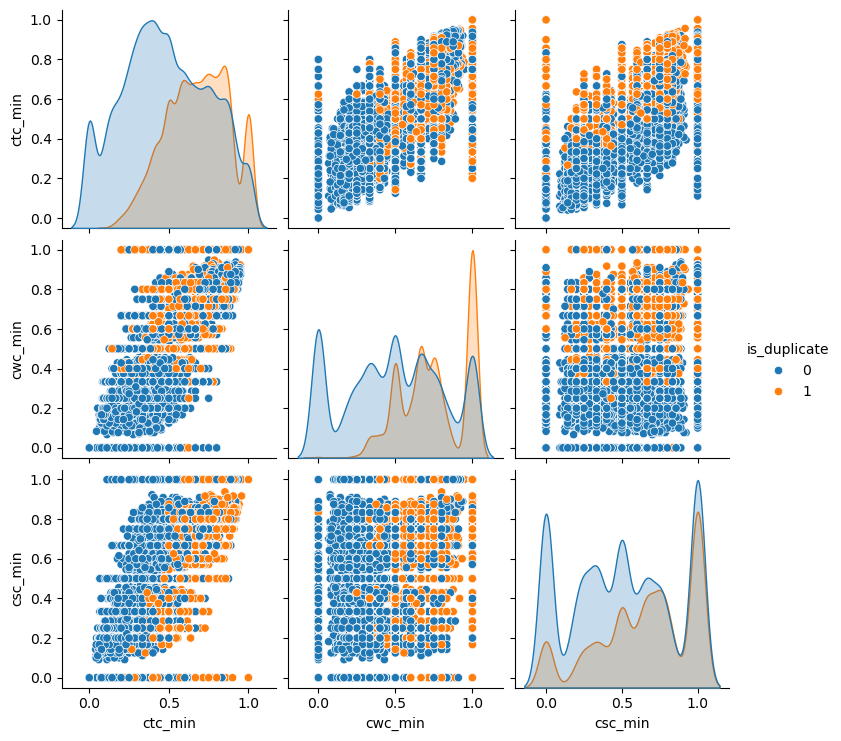

In [87]:
sns.pairplot(new_df[['ctc_min','cwc_min','csc_min','is_duplicate']], hue = 'is_duplicate')

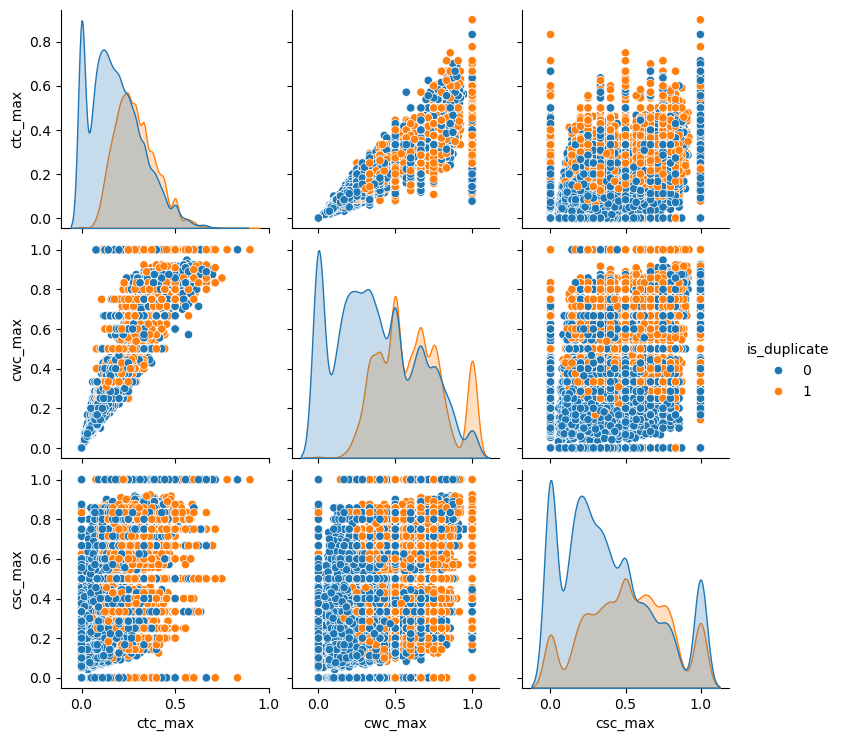

In [88]:
sns.pairplot(new_df[['ctc_max','cwc_max','csc_max','is_duplicate']], hue = 'is_duplicate')

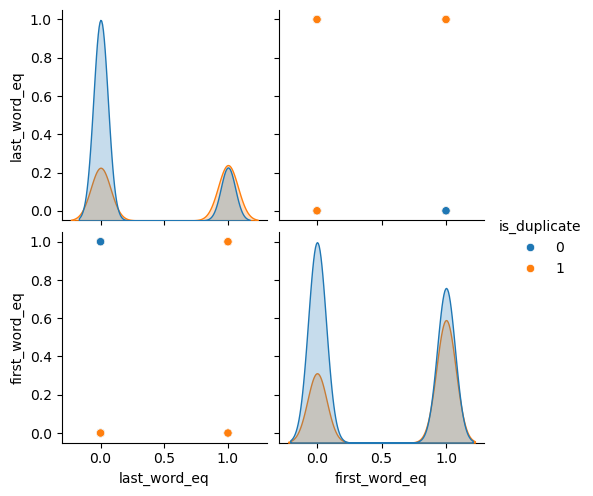

In [90]:
sns.pairplot(new_df[['last_word_eq','first_word_eq','is_duplicate']], hue = 'is_duplicate')

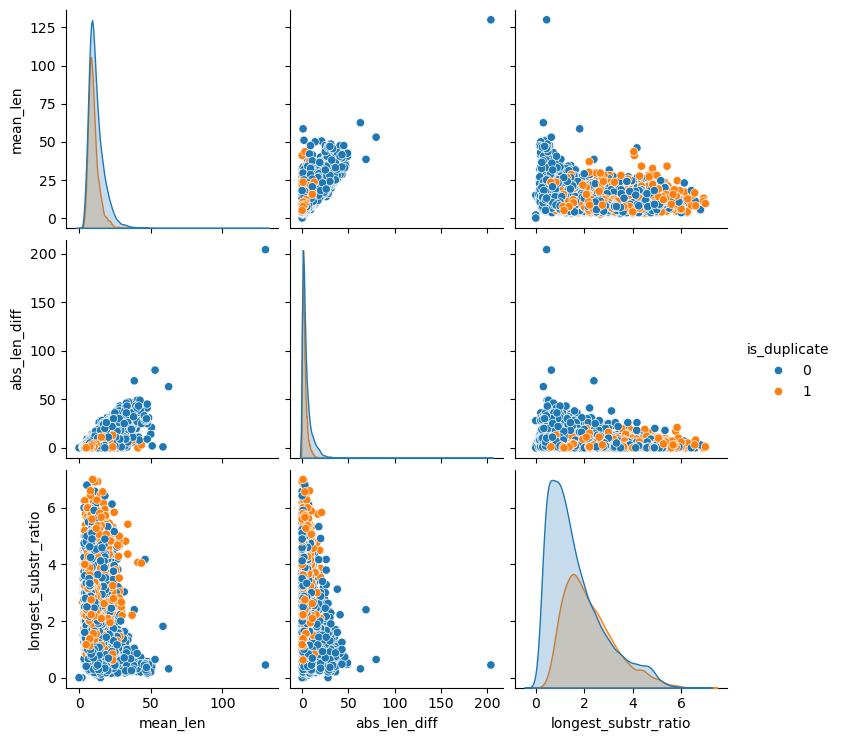

In [91]:
sns.pairplot(new_df[['mean_len','abs_len_diff','longest_substr_ratio','is_duplicate']], hue = 'is_duplicate')

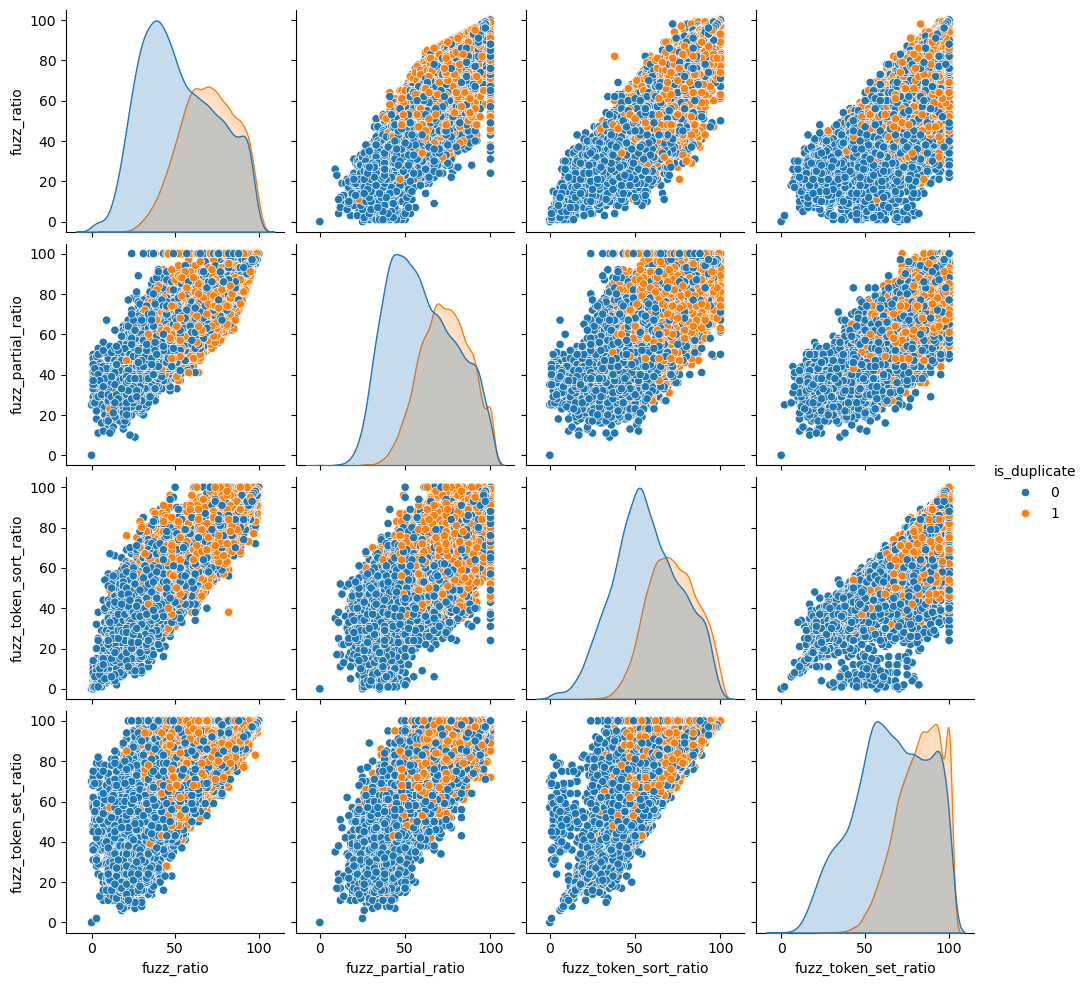

In [92]:
sns.pairplot(new_df[['fuzz_ratio','fuzz_partial_ratio','fuzz_token_sort_ratio','fuzz_token_set_ratio','is_duplicate']], hue = 'is_duplicate')

In [93]:
from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(new_df[['cwc_min','cwc_max','csc_min','csc_max','ctc_min','ctc_max','last_word_eq','first_word_eq','abs_len_diff','mean_len','longest_substr_ratio','fuzz_ratio','fuzz_partial_ratio','fuzz_token_sort_ratio','fuzz_token_set_ratio']])
y = new_df['is_duplicate'].values

In [95]:
# Using TSNE for dimensionality reduction to 3
from sklearn.manifold import TSNE

tsne2d = TSNE(
    n_components = 2,
    init = 'random',
    random_state = 101,
    method = 'barnes_hut',
    n_iter = 1000,
    verbose = 2,
    angle = 0.5
).fit_transform(X)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 30000 samples in 0.166s...
[t-SNE] Computed neighbors for 30000 samples in 9.969s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30000
[t-SNE] Computed conditional probabilities for sample 2000 / 30000
[t-SNE] Computed conditional probabilities for sample 3000 / 30000
[t-SNE] Computed conditional probabilities for sample 4000 / 30000
[t-SNE] Computed conditional probabilities for sample 5000 / 30000
[t-SNE] Computed conditional probabilities for sample 6000 / 30000
[t-SNE] Computed conditional probabilities for sample 7000 / 30000
[t-SNE] Computed conditional probabilities for sample 8000 / 30000
[t-SNE] Computed conditional probabilities for sample 9000 / 30000
[t-SNE] Computed conditional probabilities for sample 10000 / 30000
[t-SNE] Computed conditional probabilities for sample 11000 / 30000
[t-SNE] Computed conditional probabilities for sample 12000 / 30000
[t-SNE] Computed conditional probabilities for sam

C:\Users\hp\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\hp\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\hp\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\hp\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[t-SNE] Iteration 50: error = 109.8317719, gradient norm = 0.0218966 (50 iterations in 11.848s)
[t-SNE] Iteration 100: error = 89.5411377, gradient norm = 0.0078390 (50 iterations in 10.406s)
[t-SNE] Iteration 150: error = 85.3498306, gradient norm = 0.0045095 (50 iterations in 9.892s)
[t-SNE] Iteration 200: error = 83.4985199, gradient norm = 0.0032316 (50 iterations in 9.687s)
[t-SNE] Iteration 250: error = 82.4251404, gradient norm = 0.0024595 (50 iterations in 9.440s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.425140
[t-SNE] Iteration 300: error = 3.3729362, gradient norm = 0.0073278 (50 iterations in 9.517s)
[t-SNE] Iteration 350: error = 2.7585702, gradient norm = 0.0073178 (50 iterations in 9.434s)
[t-SNE] Iteration 400: error = 2.4285021, gradient norm = 0.0068330 (50 iterations in 9.156s)
[t-SNE] Iteration 450: error = 2.2225797, gradient norm = 0.0064225 (50 iterations in 9.646s)
[t-SNE] Iteration 500: error = 2.0806215, gradient norm = 0.0060794 (

In [98]:
tsne2d

array([[ 31.63644  ,  58.81479  ],
       [ 17.22949  ,  28.282202 ],
       [-38.43686  ,  -2.0779321],
       ...,
       [-18.442762 ,  84.16948  ],
       [ 42.444843 ,  72.868866 ],
       [-97.09722  ,  14.308959 ]], dtype=float32)

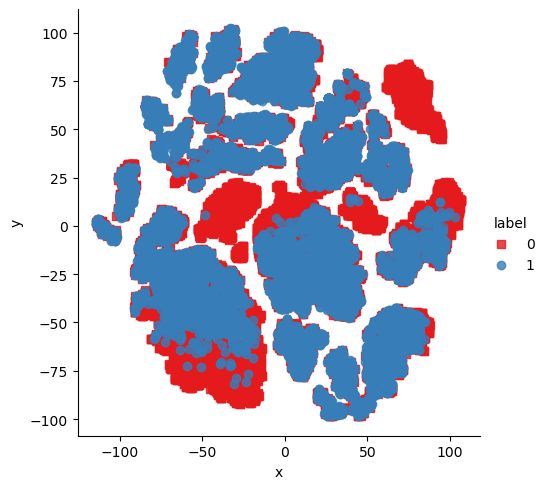

In [100]:
x_df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data=x_df, x='x', y='y', hue='label', fit_reg=False,palette="Set1",markers=['s','o'])

In [101]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
8067,how do i play pokémon go in korea,how do i play pokémon go in china
368101,what are some of the best side dishes for crab...,what are some good side dishes for buffalo chi...
70497,which is more advisable and better material fo...,what is the best server setup for buddypress
226567,how do i improve logical programming skills,how can i improve my logical skills for progra...
73186,how close we are to see 3rd world war,how close is a world war iii


In [102]:
final_df = new_df.drop(columns = ['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 23)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_word,total_words,word_share,cwc_min,cwc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,fuzz_token_sort_ratio,fuzz_token_set_ratio
8067,0,33,33,8,8,7,16,0.44,0.749813,0.749813,...,0.374953,0.0,1.0,0.0,8.0,3.111111,88,88,81,90
368101,0,52,50,11,9,6,20,0.30,0.399920,0.399920,...,0.181802,0.0,1.0,2.0,10.0,1.700000,73,72,73,73
70497,0,94,44,16,8,2,24,0.08,0.000000,0.000000,...,0.000000,0.0,0.0,8.0,12.0,0.555556,35,43,36,24
226567,1,43,51,7,9,6,16,0.38,0.999750,0.999750,...,0.444395,0.0,1.0,2.0,8.0,1.500000,72,67,89,96
73186,1,37,28,9,7,4,16,0.25,0.749813,0.599880,...,0.333296,0.0,1.0,2.0,8.0,1.250000,68,61,71,81


In [103]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 3000)
questions = list(ques_df['question1'])+list(ques_df['question2'])
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [104]:
q1_arr.shape

(30000, 3000)

In [105]:
q2_arr.shape

(30000, 3000)

In [107]:
q1_arr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [108]:
temp_df1 = pd.DataFrame(q1_arr, index = ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index = ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis = 1)
temp_df.shape

(30000, 6000)

In [109]:
final_df = pd.concat([final_df,temp_df], axis = 1)
print(final_df.shape)
final_df.head()

(30000, 6023)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,common_word,total_words,word_share,cwc_min,cwc_max,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
8067,0,33,33,8,8,7,16,0.44,0.749813,0.749813,...,0,0,0,0,0,0,0,0,0,0
368101,0,52,50,11,9,6,20,0.30,0.399920,0.399920,...,0,0,0,0,0,0,0,0,0,0
70497,0,94,44,16,8,2,24,0.08,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
226567,1,43,51,7,9,6,16,0.38,0.999750,0.999750,...,0,0,0,0,0,0,0,0,0,0
73186,1,37,28,9,7,4,16,0.25,0.749813,0.599880,...,0,0,0,0,0,0,0,0,0,0


In [110]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(final_df.iloc[:,1:].values, final_df.iloc[:,0].values, test_size = 0.2, random_state = 42)

In [111]:
X_train.shape

(24000, 6022)

In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7976666666666666

In [118]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)

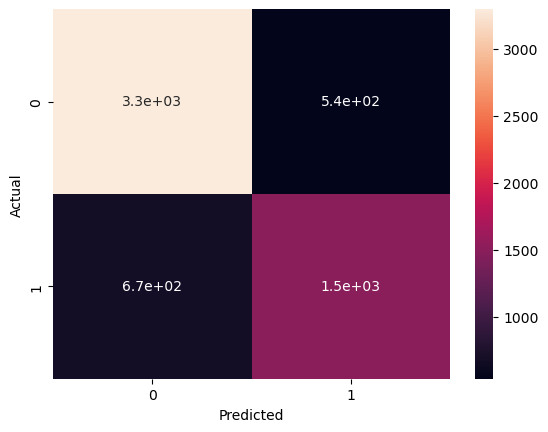

In [119]:
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [120]:
# Now to deploy the model

**We have to make a system where rf.predict takes an array of size (1,6022) where 3000 features are from each question and remaining 22 are handmade features**

In [124]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return len(w1 & w2)

In [125]:
def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return (len(w1) + len(w2))

In [126]:
def test_fetch_token_features(q1,q2):
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [127]:
def test_fetch_length_features(q1,q2):
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features

In [128]:
def test_fetch_fuzzy_features(q1,q2):
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [135]:
def query_point_creator(q1,q2):
    input_query = []
    # preprocessing the data

    q1 = preprocess(q1)
    q2 = preprocess(q2)

    # fetch basic features
    input_query.append(len(q1))
    input_query.append(len(q2))

    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))

    input_query.append(test_common_words(q1,q2))
    input_query.append(test_total_words(q1,q2))
    input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))

    # fetch token features
    token_features = test_fetch_token_features(q1,q2)
    input_query.extend(token_features)

    # fetch length based features
    length_features = test_fetch_length_features(q1,q2)
    input_query.extend(length_features)

    # fetch fuzzy features
    fuzzy_features = test_fetch_fuzzy_features(q1,q2)
    input_query.extend(fuzzy_features)

    # BoW Feature for q1
    q1_bow = cv.transform([q1]).toarray()

    # BoW Feature for q2
    q2_bow = cv.transform([q2]).toarray()

    return np.hstack((np.array(input_query).reshape(1,22),q1_bow,q2_bow))

In [143]:
q1 = "Where is the capital of India?"
q2 = "What is the current capital of Pakistan?"

In [144]:
query_point_creator(q1,q2)

array([[29., 39.,  6., ...,  0.,  0.,  0.]])

In [145]:
query_point_creator(q1,q2).shape

(1, 6022)

In [146]:
rf.predict(query_point_creator(q1,q2))

array([0])

In [148]:
import pickle
pickle.dump(rf, open('model.pkl','wb'))
pickle.dump(cv, open('cv.pkl','wb'))